In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
x = tf.placeholder(tf.float32, [None, 5])

In [4]:
x

<tf.Tensor 'Placeholder:0' shape=(?, 5) dtype=float32>

In [5]:
w= tf.Variable(tf.zeros([5,1]))
y= tf.matmul(x,w)

In [6]:
t = tf.placeholder(tf.float32, [None , 1])
loss = tf.reduce_sum(tf.square(y-t))

In [7]:
train_step = tf.train.AdamOptimizer().minimize(loss)

In [8]:
sess = tf.Session()

In [9]:
sess.run(tf.initialize_all_variables())

In [10]:
train_t = np.array([5.2, 5.7, 8.6 , 14.9,18.2,20.4,25.5,26.4,22.8,17.5,11.1,6.6])
train_t = train_t.reshape([12,1])
train_x = np.zeros([12,5])
for row, month in enumerate(range(1,13)):
        for col, n in enumerate(range(0,5)):
            train_x[row][col] = month **n

In [12]:
i = 0
for _ in range(100000):
    i+=1
    sess.run(train_step, feed_dict={x:train_x, t:train_t})
    if i % 10000 == 0:
        loss_val = sess.run(loss, feed_dict={x:train_x, t:train_t})
        print ('step: %d , loss: %f' % (i,loss_val))

step: 10000 , loss: 31.014391
step: 20000 , loss: 29.295158
step: 30000 , loss: 28.033054
step: 40000 , loss: 26.855808
step: 50000 , loss: 25.771938
step: 60000 , loss: 26.711918
step: 70000 , loss: 24.436256


KeyboardInterrupt: 

In [13]:
w_val = sess.run(w)
print w_val

[[ 3.01845002]
 [-0.80815315]
 [ 1.55384421]
 [-0.17562692]
 [ 0.00434812]]


In [14]:
def predict(x):
    result =0.0
    for n in range(0,5):
        result += w_val[n][0] * x**n
    return result

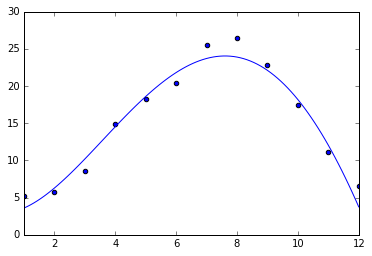

In [27]:
fig = plt.figure()
subplot = fig.add_subplot(1,1,1)
subplot.set_xlim(1,12)
subplot.scatter(range(1,13), train_t)
linex = np.linspace(1,12,100)
liney = predict(linex)
subplot.plot(linex , liney)